In [1]:
import os
import glob

import pandas as pd

from PIL import Image
from jina import Document, DocumentArray

from matplotlib import pyplot as plt
from matplotlib.pyplot import imshow

from annlite import AnnLite

os.environ['JINA_LOG_LEVEL'] = 'DEBUG'

In [3]:
MAX_NUM_DOCS = 200

df = pd.read_csv('/home/aswin/data/archive/styles.csv', warn_bad_lines=True, error_bad_lines=False)
df = df.dropna()
df['year'] = df['year'].astype(int)


 (raised from /tmp/ipykernel_9811/1776761893.py:3)

 (raised from /tmp/ipykernel_9811/1776761893.py:3)
b'Skipping line 6044: expected 10 fields, saw 11\nSkipping line 6569: expected 10 fields, saw 11\nSkipping line 7399: expected 10 fields, saw 11\nSkipping line 7939: expected 10 fields, saw 11\nSkipping line 9026: expected 10 fields, saw 11\nSkipping line 10264: expected 10 fields, saw 11\nSkipping line 10427: expected 10 fields, saw 11\nSkipping line 10905: expected 10 fields, saw 11\nSkipping line 11373: expected 10 fields, saw 11\nSkipping line 11945: expected 10 fields, saw 11\nSkipping line 14112: expected 10 fields, saw 11\nSkipping line 14532: expected 10 fields, saw 11\nSkipping line 15076: expected 10 fields, saw 12\nSkipping line 29906: expected 10 fields, saw 11\nSkipping line 31625: expected 10 fields, saw 11\nSkipping line 33020: expected 10 fields, saw 11\nSkipping line 35748: expected 10 fields, saw 11\nSkipping line 35962: expected 10 fields, saw 11\nSkipping line 377

In [4]:
import os

def get_product_docs(max_num: int = MAX_NUM_DOCS):
    da = DocumentArray()
    for index, row in df.iterrows():
        doc_id = row.pop('id')
        doc_uri = f'/home/aswin/Data/archive/images/{doc_id}.jpg'
        if not os.path.exists(doc_uri):
            continue

        doc = Document(id=str(doc_id), uri=doc_uri, tags=dict(row))
        da.append(doc)
        if len(da) == max_num:
            break
    
    return da

In [5]:
docs = get_product_docs(500)

In [6]:
def preproc(d: Document):
    return (d.load_uri_to_image_tensor()  # load
             .set_image_tensor_normalization()  # normalize color 
             .set_image_tensor_channel_axis(-1, 0))  # switch color axis

docs.apply(preproc)

╭─────── Documents Summary ────────╮
│                                  │
│   Length                 0       │
│   Homogenous Documents   False   │
│   Multimodal dataclass   True    │
│                                  │
╰──────────────────────────────────╯

In [7]:
for doc in docs:
  doc.set_image_tensor_normalization()

In [18]:
 from clip_client import Client

 c = Client('grpc://0.0.0.0:51000')

In [ ]:
r = c.encode(['First do it', 'then do it right', 'then do it better'])

print(r.shape)

In [17]:
from clip_client import Client

c = Client('grpc://185.199.104.22:51000')

docs = c.encode(docs)

DEBUG  GRPCClient@9811 connected to 185.199.104.22:51000                                        [08/16/22 19:17:35]

ERROR  GRPCClient@9811 gRPC error: StatusCode.UNAVAILABLE failed to connect to all addresses                       
       The ongoing request is terminated as the server is not available or closed already.                         

Exception in thread Thread-35:
Traceback (most recent call last):
  File "/home/aswin/anaconda3/envs/jina/lib/python3.9/threading.py", line 973, in _bootstrap_inner
    self.run()
  File "/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/jina/helper.py", line 1292, in run
    self.result = asyncio.run(func(*args, **kwargs))
  File "/home/aswin/anaconda3/envs/jina/lib/python3.9/asyncio/runners.py", line 44, in run
    return loop.run_until_complete(main)
  File "/home/aswin/anaconda3/envs/jina/lib/python3.9/asyncio/base_events.py", line 647, in run_until_complete
    return future.result()
  File "/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/jina/clients/mixin.py", line 176, in _get_results
    async for resp in c._get_results(*args, **kwargs):
  File "/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/jina/clients/base/grpc.py", line 115, in _get_results
    raise ConnectionError(my_details) from None
ConnectionError: failed to connect to all addresses

BadClient: something wrong when running the eventloop, result can not be retrieved

In [6]:
import torchvision
model = torchvision.models.resnet50(pretrained=True)  # load ResNet50
docs.embed(model, batch_size=8, device='cpu', to_numpy=True)

╭───────────────────────────────── Documents Summary ──────────────────────────────────╮
│                                                                                      │
│   Length                 500                                                         │
│   Homogenous Documents   True                                                        │
│   Common Attributes      ('id', 'tensor', 'mime_type', 'uri', 'tags', 'embedding')   │
│   Multimodal dataclass   False                                                       │
│                                                                                      │
╰──────────────────────────────────────────────────────────────────────────────────────╯
╭────────────────────── Attributes Summary ───────────────────────╮
│                                                                 │
│   Attribute   Data type      #Unique values   Has empty value   │
│  ─────────────────────────────────────────────────────────────  │
│   embedding   ('ndarray',)   500              False             │
│   id          ('str',)       500              False             │
│   mime_type   ('str',)       1                False             │
│   tags        ('dict',)      500              False             │
│   tensor      ('ndarray',)   500              False             │
│   uri         ('str',)       500              False             │
│                                                                 │
╰─────────────────────────────────────────────────────────────────╯

In [7]:
docs[0]

📄 Document: 39386
╭───────────┬──────────────────────────────────────────────────────────────────╮
│ Attribute │ Value                                                            │
├───────────┼──────────────────────────────────────────────────────────────────┤
│ tensor    │ <class 'numpy.ndarray'> in shape (3, 80, 60), dtype: float32     │
│ mime_type │ image/jpeg                                                       │
│ uri       │ /home/aswin/Data/archive/images/39386.jpg                        │
│ tags      │ {'gender': 'Men', 'masterCategory': 'Apparel', 'subCategory':    │
│           │ 'Bottomwear', 'articleType': 'Jeans', 'baseColour': 'Blue',      │
│           │ 'season': 'Summer', 'year': 2012, 'usage': 'Casual',             │
│           │ 'productDisplayName': 'Peter England Men Party Blue Jeans'}      │
│ embedding │ <class 'numpy.ndarray'> in shape (1000,), dtype: float32         │
╰───────────┴──────────────────────────────────────────────────────────────────╯

In [11]:
# clear the workspace folder
!rm -rf workspace/*

index = AnnLite(dim=1000, 
               metric='cosine', 
               columns=[
                        ('year', int), 
                        ('baseColour', str), 
                        ('masterCategory', str)
                ], 
               data_path='./workspace')

index.index(docs)

In [8]:
before_year = "2017" #@param [2017, 2018, 2019]
category = "Apparel" #@param ["Apparel", "Footwear"]
color = "Brown" #@param ["White", "Black", "Brown"]

In [ ]:
query = docs[0:1]
index.search(query, 
             filter={
                 'year': {'$lte': before_year}, 
                 'masterCategory': {'$eq': category},
                 'baseColour': {'$eq': color}
                }, 
             limit=5, 
             include_metadata=True)


img = Image.open(query[0].uri)
imshow(img)
plt.title(f'Query: {query[0].tags["productDisplayName"]}')
plt.show()
for doc in query:
    for k, match in enumerate(doc.matches):
        print(f'[{k}] ({match.scores["cosine"].value}) id: {match.id} tags: {dict(match.tags)}')
        img = Image.open(match.uri)
        imshow(img)
        plt.title(f'{match.tags["productDisplayName"]}')
        plt.show()

In [9]:
from jina import Flow

f = Flow().add(
    uses='jinahub://PQLiteIndexer/latest',
    uses_with={
        'dim': 1000,
        'metric': 'cosine',
        'columns': [
            ('year', 'int'), 
            ('baseColour', 'str'), 
            ('masterCategory', 'str')
        ],
        'include_metadata': True
    },
    uses_metas={'workspace': './workspace'}, 
    install_requirements=True
)

In [10]:
# clear the workspace folder
!rm -rf workspace/*

with f:
    f.index(inputs=docs, show_progress=True)

Output()

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:111)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:112)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:111)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:112)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:111)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:112)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:111)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:112)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:111)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:112)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:111)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:112)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:111)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:112)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:111)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:112)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:111)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:112)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:111)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:112)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:111)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:112)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:111)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:112)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:111)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:112)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:111)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:112)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:111)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:112)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:111)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:112)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:111)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:112)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:111)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:112)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:111)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:112)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:111)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:112)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:111)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:112)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:111)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:112)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:111)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:112)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:111)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:112)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:111)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:112)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:111)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:112)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:111)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:112)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:111)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:112)

Output()

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:111)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:112)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:111)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:112)

DEBUG  gateway/rep-0@35130 ready and listening                                                  [08/16/22 16:25:25]

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:111)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:112)

DEBUG  executor0/rep-0@35618 <executor.AnnLiteIndexer object at 0x7f3e74ce3d60> is successfully [08/16/22 16:25:25]
       loaded!                                                                                                     

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:111)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:112)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:111)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:112)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:111)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:112)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:111)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:112)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:111)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:112)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:111)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:112)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:111)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:112)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:111)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:112)

─────────────────────────────────────────── 🎉 Flow is ready to serve! ────────────────────────────────────────────
╭────────────── 🔗 Endpoint ───────────────╮
│  ⛓      Protocol                   GRPC  │
│  🏠        Local          ]8;id=158667;grpc://0.0.0.0:55396\0.0.0.0]8;;\]8;id=850167;grpc://0.0.0.0:55396\:]8;;\]8;id=213061;grpc://0.0.0.0:55396\55396]8;;\  │
│  🔒      Private    ]8;id=329428;grpc://192.168.0.102:55396\192.168.0.102]8;;\]8;id=405252;grpc://192.168.0.102:55396\:]8;;\]8;id=618868;grpc://192.168.0.102:55396\55396]8;;\  │
│  🌍       Public      ]8;id=117182;grpc://93.241.46.4:55396\93.241.46.4]8;;\]8;id=810504;grpc://93.241.46.4:55396\:]8;;\]8;id=427521;grpc://93.241.46.4:55396\55396]8;;\  │
╰──────────────────────────────────────────╯

DEBUG  Flow@35130 2 Deployments (i.e. 2 Pods) are running in this Flow                          [08/16/22 16:25:26]

DEBUG  GRPCClient@35130 connected to 0.0.0.0:55396                                              [08/16/22 16:25:27]

Output()

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:111)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:112)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:111)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:112)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:111)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:112)

DEBUG  executor0/rep-0@35618 recv DataRequest at /index with id:                                [08/16/22 16:25:27]
       842da2cbe315470fa2ffb59b22f59111                                                                            

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:111)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:112)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:111)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:112)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:111)

DEBUG  executor0/rep-0@35618 got an endpoint discovery request                                                     

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:112)

DEBUG  executor0/rep-0@35618 recv DataRequest at /index with id:                                [08/16/22 16:25:28]
       78e19ee0f6cb46fd888fa44f90467320                                                                            

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:111)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:112)

DEBUG  executor0/rep-0@35618 recv DataRequest at /index with id:                                                   
       13947a0b2e8f4892b560373e0ede39d5                                                                            

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:111)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:112)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:111)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:112)

DEBUG  executor0/rep-0@35618 recv DataRequest at /index with id:                                                   
       9304db76e9b449fc91b4df975555638c                                                                            

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:111)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:112)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:111)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:112)

DEBUG  executor0/rep-0@35618 recv DataRequest at /index with id:                                [08/16/22 16:25:29]
       01a1533eb41f445caf887a08c23d2e9b                                                                            

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:111)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:112)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:111)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:112)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:111)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:112)

DEBUG  gateway/rep-0@35130 waiting for ready or shutdown signal from runtime                    [08/16/22 16:25:29]

DEBUG  gateway/rep-0@35130 terminate                                                                               

DEBUG  gateway/rep-0@35130 terminating the runtime process                                                         

DEBUG  gateway/rep-0@35130 runtime process properly terminated                                                     

DEBUG  gateway/rep-0@35130 terminated                                                                              

DEBUG  gateway/rep-0@35130 joining the process                                                                     

DEBUG  gateway/rep-0@35130 successfully joined the process                                                         

DEBUG  executor0/rep-0@35130 waiting for ready or shutdown signal from runtime                  [08/16/22 16:25:29]

DEBUG  executor0/rep-0@35130 terminate                                                                             

DEBUG  executor0/rep-0@35130 terminating the runtime process                                                       

DEBUG  executor0/rep-0@35130 runtime process properly terminated                                                   

DEBUG  executor0/rep-0@35618 cancel WorkerRuntime                                                                  

DEBUG  executor0/rep-0@35618 stopped GRPC Server                                                                   

DEBUG  executor0/rep-0@35618 cancel WorkerRuntime                                                                  

DEBUG  executor0/rep-0@35618 stopped GRPC Server                                                                   

DEBUG  executor0/rep-0@35130 terminated                                                                            

DEBUG  executor0/rep-0@35618 process terminated                                                 [08/16/22 16:25:29]

DEBUG  executor0/rep-0@35130 joining the process                                                                   

DEBUG  executor0/rep-0@35130 successfully joined the process                                                       

DEBUG  Flow@35130 flow is closed!                                                               [08/16/22 16:25:29]

In [ ]:
import os
import glob

import pandas as pd

from PIL import Image
from jina import Document, DocumentArray

from matplotlib import pyplot as plt
from matplotlib.pyplot import imshow

from annlite import AnnLite

os.environ['JINA_LOG_LEVEL'] = 'DEBUG'
MAX_NUM_DOCS = 200

df = pd.read_csv('/home/aswin/Data/archive/styles.csv', warn_bad_lines=True, error_bad_lines=False)
df = df.dropna()
df['year'] = df['year'].astype(int)
def get_product_docs(max_num: int = MAX_NUM_DOCS):
    da = DocumentArray()
    for index, row in df.iterrows():
        doc_id = row.pop('id')
        doc_uri = f'/home/aswin/Data/archive/images/{doc_id}.jpg'
        if not os.path.exists(doc_uri):
            continue

        doc = Document(id=str(doc_id), uri=doc_uri, tags=dict(row))
        da.append(doc)
        if len(da) == max_num:
            break
    
    return da
docs = get_product_docs(500)
def preproc(d: Document):
    return (d.load_uri_to_image_tensor()  # load
             .set_image_tensor_normalization()  # normalize color 
             .set_image_tensor_channel_axis(-1, 0))  # switch color axis

docs.apply(preproc)
import torchvision
model = torchvision.models.resnet50(pretrained=True)  # load ResNet50
docs.embed(model, batch_size=8, device='cpu', to_numpy=True)
from jina import Flow

f = Flow().add(
    uses='jinahub://PQLiteIndexer/latest',
    uses_with={
        'dim': 1000,
        'metric': 'cosine',
        'columns': [
            ('year', 'int'), 
            ('baseColour', 'str'), 
            ('masterCategory', 'str')
        ],
        'include_metadata': True
    },
    uses_metas={'workspace': './workspace'}, 
    install_requirements=True
)
with f:
    f.index(inputs=docs, show_progress=True)

In [11]:
query = docs[0:1]
with f:
    resp = f.search(inputs=query, 
                    return_results=True, 
                    parameters={
                        'filter': {
                            'year': {'$lte': before_year},
                            'masterCategory': {'$eq': category},
                            'baseColour': {'$eq': color}
                        },
                        'limit': 5
                    })

Output()

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:111)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:112)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:111)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:112)

DEBUG  gateway/rep-0@10739 ready and listening                                                  [08/16/22 12:37:04]

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:111)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:112)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:111)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:112)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:111)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:112)

DEBUG  executor0/rep-0@12439 <executor.AnnLiteIndexer object at 0x7f8518e346d0> is successfully [08/16/22 12:37:04]
       loaded!                                                                                                     

DEBUG  executor0/rep-0@12439 start listening on 0.0.0.0:51227                                                      

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:111)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:112)

DEBUG  executor0/rep-0@10739 ready and listening                                                [08/16/22 12:37:04]

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:111)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:112)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:111)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:112)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:111)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:112)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:111)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:112)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:111)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:112)

─────────────────────────────────────────── 🎉 Flow is ready to serve! ────────────────────────────────────────────
╭────────────── 🔗 Endpoint ───────────────╮
│  ⛓      Protocol                   GRPC  │
│  🏠        Local          ]8;id=486160;grpc://0.0.0.0:58857\0.0.0.0]8;;\]8;id=784308;grpc://0.0.0.0:58857\:]8;;\]8;id=979237;grpc://0.0.0.0:58857\58857]8;;\  │
│  🔒      Private    ]8;id=285893;grpc://192.168.0.102:58857\192.168.0.102]8;;\]8;id=817650;grpc://192.168.0.102:58857\:]8;;\]8;id=469240;grpc://192.168.0.102:58857\58857]8;;\  │
│  🌍       Public      ]8;id=791946;grpc://93.241.46.4:58857\93.241.46.4]8;;\]8;id=526532;grpc://93.241.46.4:58857\:]8;;\]8;id=690709;grpc://93.241.46.4:58857\58857]8;;\  │
╰──────────────────────────────────────────╯

DEBUG  Flow@10739 2 Deployments (i.e. 2 Pods) are running in this Flow                          [08/16/22 12:37:05]

DEBUG  GRPCClient@10739 connected to 0.0.0.0:58857                                              [08/16/22 12:37:05]

DEBUG  executor0/rep-0@12439 recv DataRequest at /search with id:                               [08/16/22 12:37:05]
       1bb5f657d6ab41a7a204ac5c20fd2dea                                                                            

DEBUG  executor0/rep-0@12439 got an endpoint discovery request                                                     

DEBUG  gateway/rep-0@10739 waiting for ready or shutdown signal from runtime                    [08/16/22 12:37:05]

DEBUG  gateway/rep-0@10739 terminate                                                                               

DEBUG  gateway/rep-0@10739 terminating the runtime process                                                         

DEBUG  gateway/rep-0@10739 runtime process properly terminated                                                     

DEBUG  gateway/rep-0@10739 terminated                                                                              

DEBUG  gateway/rep-0@10739 joining the process                                                                     

DEBUG  gateway/rep-0@10739 successfully joined the process                                                         

DEBUG  executor0/rep-0@10739 waiting for ready or shutdown signal from runtime                  [08/16/22 12:37:05]

DEBUG  executor0/rep-0@10739 terminate                                                                             

DEBUG  executor0/rep-0@10739 terminating the runtime process                                                       

DEBUG  executor0/rep-0@10739 runtime process properly terminated                                                   

DEBUG  executor0/rep-0@12439 cancel WorkerRuntime                                                                  

DEBUG  executor0/rep-0@12439 stopped GRPC Server                                                                   

DEBUG  executor0/rep-0@12439 cancel WorkerRuntime                                                                  

DEBUG  executor0/rep-0@12439 stopped GRPC Server                                                                   

DEBUG  executor0/rep-0@10739 terminated                                                                            

DEBUG  executor0/rep-0@12439 process terminated                                                 [08/16/22 12:37:05]

DEBUG  executor0/rep-0@10739 joining the process                                                                   

DEBUG  executor0/rep-0@10739 successfully joined the process                                                       

DEBUG  Flow@10739 flow is closed!                                                                                  

In [15]:
for m in resp[0].matches:
    m.set_image_blob_channel_axis(0, -1).set_image_blob_inv_normalization()

resp[0].matches[0]

📄 Document: 10439
╭───────────┬──────────────────────────────────────────────────────────────────╮
│ Attribute │ Value                                                            │
├───────────┼──────────────────────────────────────────────────────────────────┤
│ adjacency │ 1                                                                │
│ tensor    │ <class 'numpy.ndarray'> in shape (3, 80, 60), dtype: float32     │
│ mime_type │ image/jpeg                                                       │
│ uri       │ /home/aswin/Data/archive/images/10439.jpg                        │
│ tags      │ {'season': 'Fall', 'subCategory': 'Topwear', 'masterCategory':   │
│           │ 'Apparel', 'gender': 'Men', 'productDisplayName': 'Flying        │
│           │ Machine Men Walnut Brown Tshirts', 'articleType': 'Tshirts',     │
│           │ 'usage': 'Casual', 'baseColour': 'Brown', 'year': 2011.0}        │
│ embedding │ <class 'numpy.ndarray'> in shape (1000,), dtype: float32         │
│ scores    │ defaultdict(<class 'docarray.score.NamedScore'>, {'cosine':      │
│           │ {'value': 0.23150372505187988}})                                 │
╰───────────┴──────────────────────────────────────────────────────────────────╯

(0.23150372505187988) id: 10439 tags: {'season': 'Fall', 'subCategory': 'Topwear', 'masterCategory': 'Apparel', 'gender': 'Men', 'productDisplayName': 'Flying Machine Men Walnut Brown Tshirts', 'articleType': 'Tshirts', 'usage': 'Casual', 'baseColour': 'Brown', 'year': 2011.0}


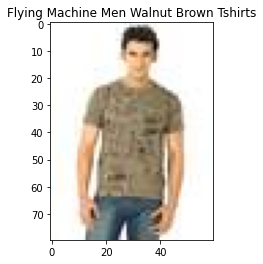

(0.33637523651123047) id: 20258 tags: {'season': 'Fall', 'masterCategory': 'Apparel', 'productDisplayName': 'Wrangler Men Polo Charcoal T-shirt', 'usage': 'Casual', 'subCategory': 'Topwear', 'gender': 'Men', 'articleType': 'Tshirts', 'baseColour': 'Brown', 'year': 2011.0}


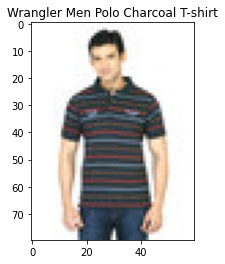

(0.43648356199264526) id: 56825 tags: {'productDisplayName': 'John Players Men Brown Shirt', 'subCategory': 'Topwear', 'articleType': 'Shirts', 'season': 'Summer', 'usage': 'Casual', 'year': 2012.0, 'masterCategory': 'Apparel', 'baseColour': 'Brown', 'gender': 'Men'}


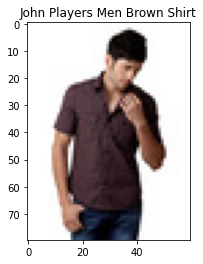

(0.4557498097419739) id: 45856 tags: {'baseColour': 'Brown', 'articleType': 'Kurtas', 'masterCategory': 'Apparel', 'gender': 'Women', 'subCategory': 'Topwear', 'year': 2012.0, 'productDisplayName': 'Vishudh Women Brown Kurta', 'season': 'Summer', 'usage': 'Ethnic'}


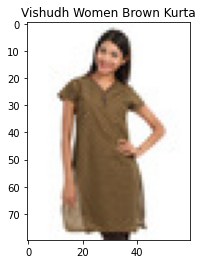

(0.46666663885116577) id: 27089 tags: {'year': 2012.0, 'articleType': 'Kurtas', 'season': 'Summer', 'usage': 'Ethnic', 'gender': 'Women', 'subCategory': 'Topwear', 'baseColour': 'Brown', 'productDisplayName': 'Aneri Women Jazz Brown Kurta', 'masterCategory': 'Apparel'}


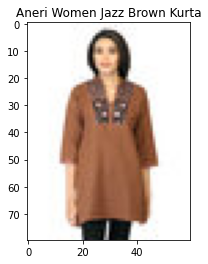

In [18]:
# for k, match in enumerate(doc.matches):
for match in resp[0].matches:
    print(f'({match.scores["cosine"].value}) id: {match.id} tags: {dict(match.tags)}')
    img = Image.open(match.uri)
    imshow(img)
    plt.title(f'{match.tags["productDisplayName"]}')
    plt.show()

In [16]:
# input = DocumentArray.from_files(['/home/aswin/Data/archive/images/11110.jpg'])
# model = torchvision.models.resnet50(pretrained=True)  # load ResNet50
# input =img.embed(, batch_size=8, device='cpu', to_numpy=True)
query = "black dress"
from jina import Client
def get_matches_from_image(input, limit=3, filters=None):
    # data = input.read()
    # query_doc = Document(blob=data)

    client = Client(host="0.0.0.0:52850")
    response = client.search(
        input,
        return_results=True,
        parameters={"limit": limit, "filter": filters},
        show_progress=True,
    )
    for match in response[0].matches:
        print(f'({match.scores["cosine"].value}) id: {match.id} tags: {dict(match.tags)}')
        img = Image.open(match.uri)
        imshow(img)
        plt.title(f'{match.tags["productDisplayName"]}')
        plt.show()
get_matches_from_image(query)

DEBUG  GRPCClient@35130 connected to 0.0.0.0:52850                                              [08/16/22 16:29:02]

Output()

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:111)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:112)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:111)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:112)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:111)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:112)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:111)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:112)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:111)

DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent() (raised from 
/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/ipywidgets/widgets/widget_output.py:112)

Exception in thread Thread-48:
Traceback (most recent call last):
  File "/home/aswin/anaconda3/envs/jina/lib/python3.9/threading.py", line 973, in _bootstrap_inner
    self.run()
  File "/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/jina/helper.py", line 1292, in run
    self.result = asyncio.run(func(*args, **kwargs))
  File "/home/aswin/anaconda3/envs/jina/lib/python3.9/asyncio/runners.py", line 44, in run
    return loop.run_until_complete(main)
  File "/home/aswin/anaconda3/envs/jina/lib/python3.9/asyncio/base_events.py", line 647, in run_until_complete
    return future.result()
  File "/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/jina/clients/mixin.py", line 176, in _get_results
    async for resp in c._get_results(*args, **kwargs):
  File "/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/jina/clients/base/grpc.py", line 90, in _get_results
    callback_exec(
  File "/home/aswin/anaconda3/envs/jina/lib/python3.9/site-packages/jina/clients/

BadClient: something wrong when running the eventloop, result can not be retrieved